# Importing Libraries and Dataset

In [2]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Download necessary NLTK resources (run once)
nltk.download('punkt_tab')
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Open Multilingual WordNet

import google

# 1. Data Loading
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datafiniti_Hotel_Reviews_Jun19.csv")
print(df.head())
print(df.info())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                     id             dateAdded           dateUpdated  \
0  AWE2FvX5RxPSIh2RscTK  2018-01-18T18:43:12Z  2019-05-20T23:55:47Z   
1  AVwcj_OhkufWRAb5wi9T  2016-11-06T20:21:05Z  2019-05-20T23:31:56Z   
2  AVwcj_OhkufWRAb5wi9T  2016-11-06T20:21:05Z  2019-05-20T23:31:56Z   
3  AVwcj_OhkufWRAb5wi9T  2016-11-06T20:21:05Z  2019-05-20T23:31:56Z   
4  AVwcj_OhkufWRAb5wi9T  2016-11-06T20:21:05Z  2019-05-20T23:31:56Z   

                          address  \
0                 5620 Calle Real   
1  5th And San Carlos PO Box 3574   
2  5th And San Carlos PO Box 3574   
3  5th And San Carlos PO Box 3574   
4  5th And San Carlos PO Box 3574   

                                          categories  \
0  Hotels,Hotels and motels,Hotel and motel mgmt....   
1                               Hotels,Lodging,Hotel   
2                               Hotels,Lodging,Hotel 

# Data Preprocessing and Tokenization

In [3]:
# 2. Data Cleaning
duplicates_subset = df[df.duplicated(subset=['reviews.text'])]
print(f"Duplicates in 'reviews.text' column: {len(duplicates_subset)}")
print(duplicates_subset)
df.drop_duplicates(subset=['reviews.text'], keep='first', inplace=True)  # Remove duplicate reviews

Duplicates in 'reviews.text' column: 230
                        id             dateAdded           dateUpdated  \
89    AV1thhZpIxWefVJwhDL7  2017-07-23T03:38:10Z  2019-05-20T16:15:57Z   
540   AWEKmgyt3-Khe5l_exCm  2018-01-18T18:45:51Z  2019-05-20T05:37:48Z   
1052  AVwear0JkufWRAb5CuHZ  2015-12-01T19:33:20Z  2019-05-18T06:15:05Z   
1116  AWB2Zvswa4HuVbedJ8WE  2017-12-21T00:00:42Z  2019-05-17T22:13:22Z   
1264  AVwchAIHIN2L1WUflybT  2015-11-06T09:24:17Z  2019-05-17T01:39:09Z   
...                    ...                   ...                   ...   
9491  AVweNseC_7pvs4fzBCjZ  2017-04-06T17:49:11Z  2018-12-18T05:56:05Z   
9493  AVweNseC_7pvs4fzBCjZ  2017-04-06T17:49:11Z  2018-12-18T05:56:05Z   
9495  AVweNseC_7pvs4fzBCjZ  2017-04-06T17:49:11Z  2018-12-18T05:56:05Z   
9530  AV6atrNyIxWefVJwqtKq  2017-09-19T15:15:43Z  2018-12-08T16:07:53Z   
9668  AVwdk4zOByjofQCxqeEN  2017-03-31T20:40:26Z  2018-12-04T15:29:16Z   

                       address  \
89           1280 N 4th Street   
54

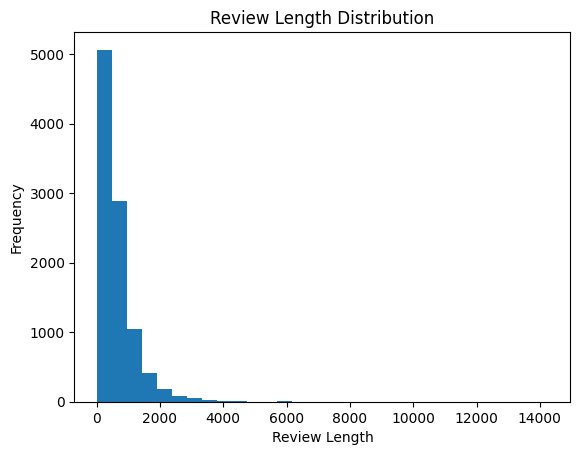

In [4]:
# 3. Review Length Distribution
df['review_length'] = df['reviews.text'].str.len()  # Character count
plt.hist(df['review_length'], bins=30)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [18]:
# 4. Text Preprocessing
stop_words = set(stopwords.words('english'))
custom_stop_words = ["hotel", "room", "stay", "place", "get", "day", "night", "time", "one", "would", "could"]

stop_words.update(custom_stop_words)
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 2]
    return " ".join(tokens)

df['processed_review'] = df['reviews.text'].apply(preprocess_text)

# Explorotary Data Analysis

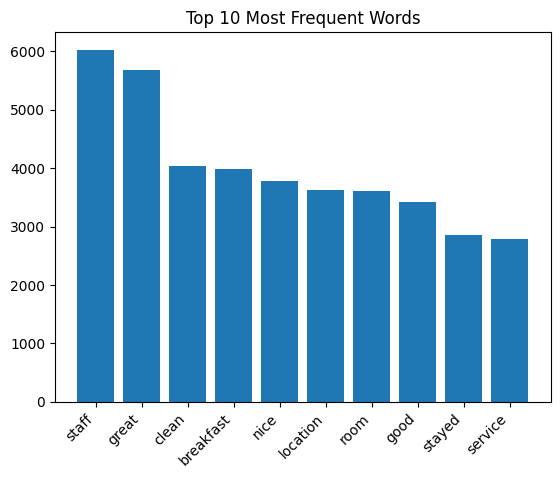

In [19]:
# 5. Word Frequencies
all_words = " ".join(df['processed_review'])
word_counts = Counter(all_words.split())
top_10_words = word_counts.most_common(10)

plt.bar([word[0] for word in top_10_words], [word[1] for word in top_10_words])
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45, ha='right')
plt.show()

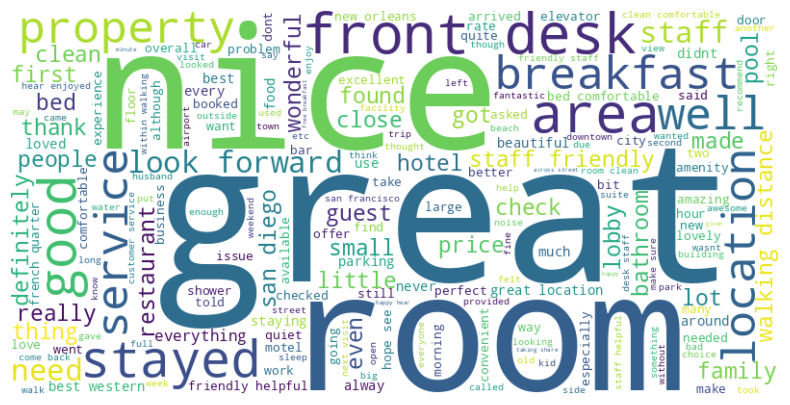

In [20]:
# 6. Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

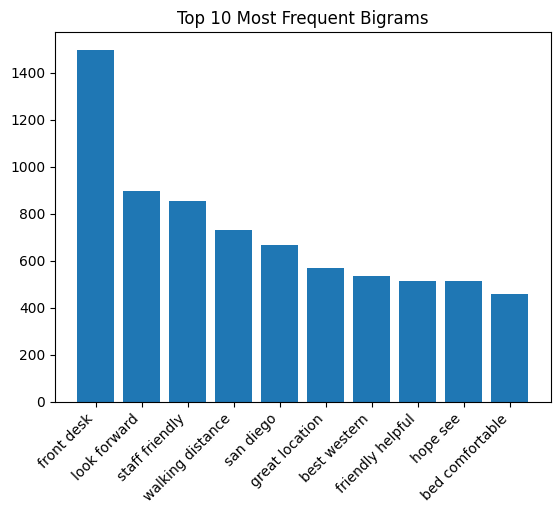

In [21]:
# 7. N-gram Analysis (Bigrams)
vectorizer = CountVectorizer(ngram_range=(2, 2))
bigram_matrix = vectorizer.fit_transform(df['processed_review'])
bigram_counts = bigram_matrix.sum(axis=0)
bigram_freq = sorted([(word, bigram_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()], key=lambda x: x[1], reverse=True)[:10]

plt.bar([bigram[0] for bigram in bigram_freq], [bigram[1] for bigram in bigram_freq])
plt.title('Top 10 Most Frequent Bigrams')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sentiment Analysis

In [22]:
# 8. Sentiment Analysis
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['reviews.text'].apply(lambda x: sia.polarity_scores(x)['compound'])

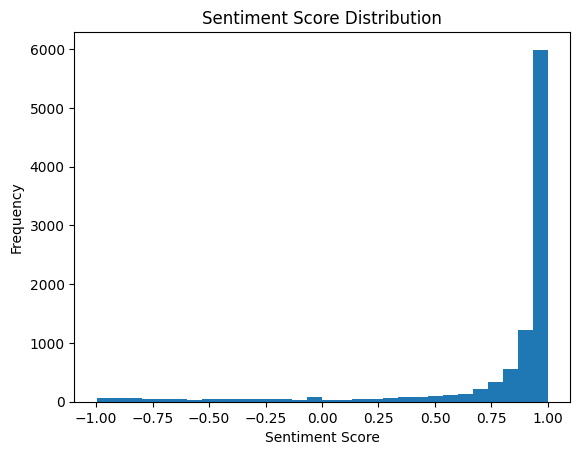

In [23]:
# a. Sentiment Distribution
plt.hist(df['sentiment_score'], bins=30)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

<ipython-input-24-92ed57099bd4>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['reviews.rating'] == r]['sentiment_score'] for r in unique_ratings], labels=unique_ratings)


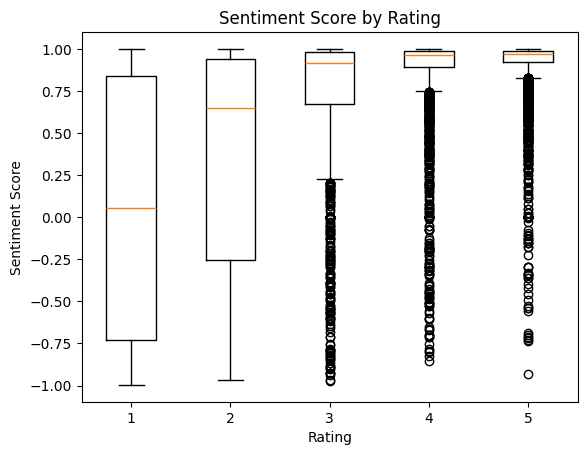

In [24]:
# b. Sentiment by Rating
if 'reviews.rating' in df.columns:
    unique_ratings = sorted(df['reviews.rating'].dropna().unique())  # Sort ratings
    plt.boxplot([df[df['reviews.rating'] == r]['sentiment_score'] for r in unique_ratings], labels=unique_ratings)
    plt.title('Sentiment Score by Rating')
    plt.xlabel('Rating')
    plt.ylabel('Sentiment Score')
    plt.show()

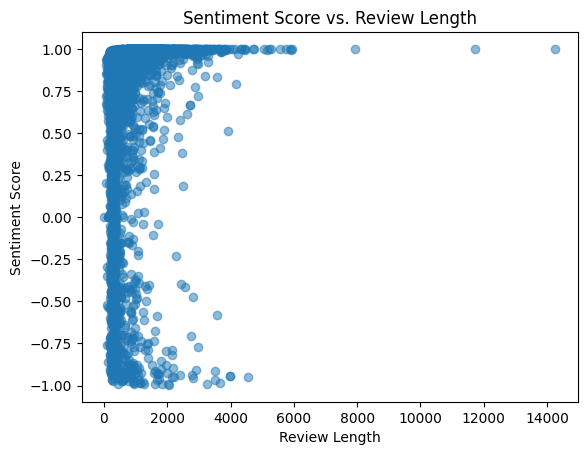

In [25]:
# c. Sentiment vs. Review Length
plt.scatter(df['review_length'], df['sentiment_score'], alpha=0.5)
plt.title('Sentiment Score vs. Review Length')
plt.xlabel('Review Length')
plt.ylabel('Sentiment Score')
plt.show()

In [26]:
# Display Final DataFrame
print(df.head())

                     id             dateAdded           dateUpdated  \
0  AWE2FvX5RxPSIh2RscTK  2018-01-18T18:43:12Z  2019-05-20T23:55:47Z   
1  AVwcj_OhkufWRAb5wi9T  2016-11-06T20:21:05Z  2019-05-20T23:31:56Z   
2  AVwcj_OhkufWRAb5wi9T  2016-11-06T20:21:05Z  2019-05-20T23:31:56Z   
3  AVwcj_OhkufWRAb5wi9T  2016-11-06T20:21:05Z  2019-05-20T23:31:56Z   
4  AVwcj_OhkufWRAb5wi9T  2016-11-06T20:21:05Z  2019-05-20T23:31:56Z   

                          address  \
0                 5620 Calle Real   
1  5th And San Carlos PO Box 3574   
2  5th And San Carlos PO Box 3574   
3  5th And San Carlos PO Box 3574   
4  5th And San Carlos PO Box 3574   

                                          categories  \
0  Hotels,Hotels and motels,Hotel and motel mgmt....   
1                               Hotels,Lodging,Hotel   
2                               Hotels,Lodging,Hotel   
3                               Hotels,Lodging,Hotel   
4                               Hotels,Lodging,Hotel   

             

# Topic Modelling with LDA

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 9. Topic Modeling (LDA)
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, max_features=1000)  # Adjust parameters as needed
tfidf = tfidf_vectorizer.fit_transform(df['processed_review'])

lda_model = LatentDirichletAllocation(n_components=10, random_state=42) # Adjust n_components for desired number of topics
lda_model.fit(tfidf)

LatentDirichletAllocation(random_state=42)

In [28]:
# Print top words for each topic
def print_top_words(model, feature_names, n_top_words):
  for topic_idx, topic in enumerate(model.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_top_words(lda_model, tfidf_vectorizer.get_feature_names_out(), 10)

# You can further explore topic assignments for each document:
# topic_assignments = lda_model.transform(tfidf)
# df['topic'] = topic_assignments.argmax(axis=1) # Assign the dominant topic to each review
# print(df.head())
# prompt: defeine what each topics are

# 1. Data Loading: Reads the hotel review dataset from a CSV file located in Google Drive.
# 2. Data Cleaning: Removes duplicate reviews based on the 'reviews.text' column.
# 3. Review Length Distribution: Creates a histogram visualizing the distribution of review lengths (character counts).
# 4. Text Preprocessing: Converts text to lowercase, removes punctuation, tokenizes, removes stop words, and lemmatizes the words in each review.  The results are stored in 'processed_review' column.
# 5. Word Frequencies: Calculates and displays the top 10 most frequent words across all processed reviews.
# 6. Word Cloud: Generates and displays a word cloud representing the frequency of words in the processed reviews.
# 7. N-gram Analysis (Bigrams): Identifies and displays the top 10 most frequent bigrams (two-word sequences) in the processed reviews.
# 8. Sentiment Analysis: Calculates sentiment scores for each review using VADER sentiment analysis and then:
#    a. Sentiment Distribution: Visualizes the distribution of sentiment scores.
#    b. Sentiment by Rating: Creates a boxplot comparing sentiment scores across different review ratings.
#    c. Sentiment vs. Review Length: Creates a scatter plot showing the relationship between review length and sentiment score.
# 9. Topic Modeling (LDA): Performs topic modeling using Latent Dirichlet Allocation (LDA) on the processed reviews.  It identifies topics based on word distributions and prints the top 10 words for each discovered topic.

Topic #1:
french quarter great orleans walking distance new staff location within
Topic #2:
spring driving else per somewhere fancy mattress working good condition
Topic #3:
nice breakfast clean great bed comfortable staff friendly good room
Topic #4:
bed door like floor didnt bathroom shower room clean good
Topic #5:
bedroom kitchen living unit suite stayed river family 100 disneyland
Topic #6:
desk front reservation guest told check booked staff service experience
Topic #7:
great good breakfast clean nice location parking restaurant area free
Topic #8:
feedback hope guest thank appreciate staff review taking experience comment
Topic #9:
great staff wonderful stayed service friendly amazing back review room
Topic #10:
great staff thank san forward enjoyed best review location look


# Visual Analysis with plyDavis

In [29]:
!pip install pyLDAvis==3.4.1  # Install a specific pyLDAvis version to ensure compatibility

import pyLDAvis
import pyLDAvis.lda_model  # Import the correct module for preparing LDA visualizations

# ... your existing code ...

pyLDAvis.enable_notebook()
vis = pyLDAvis.lda_model.prepare(lda_model, tfidf, tfidf_vectorizer)  # Use the updated prepare function
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.010622 -0.038642       1        1  22.886069
8      0.061067  0.027419       2        1  13.241854
5     -0.070247  0.077066       3        1  13.001263
9      0.087033  0.080133       4        1  12.230485
3     -0.102910 -0.020187       5        1  11.141034
7      0.012115  0.075701       6        1   9.962163
2      0.012117 -0.090368       7        1   9.198757
0      0.156179 -0.054758       8        1   5.029218
4     -0.069283 -0.059177       9        1   1.690793
1     -0.096694  0.002812      10        1   1.618363, topic_info=         Term        Freq       Total Category  logprob  loglift
84    bedroom   84.000000   84.000000  Default  30.0000  30.0000
845     suite  141.000000  141.000000  Default  29.0000  29.0000
353    french   84.000000   84.000000  Default  28.0000  28.0000
468   kitchen   69.000000   69.000000  Default  27.0000  27.0000
833    stayed  270.000000  270.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
316  facility    3.658646   66.822304  Topic10  -5.4270   1.2188
33   although    3.475044   59.605250  Topic10  -5.4785   1.2816
381      good    5.308451  299.435783  Topic10  -5.0548   0.0912
689      rate    3.547281   74.570282  Topic10  -5.4579   1.0782
890      town    3.328214   91.530366  Topic10  -5.5217   0.8095

[588 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.187712     100
0         3  0.225255     100
0         4  0.037542     100
0         5  0.112627     100
0         6  0.037542     100
...     ...       ...     ...
993       8  0.068645    year
993      10  0.009806    year
996       1  0.161247  yogurt
996       7  0.752486  yogurt
996      10  0.053749  yogurt

[3187 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 6, 10, 4, 8, 3, 1, 5, 2])

*Topics are too general and segregating them accoring to sentiment would give a clearer objective goal*

In [30]:
# Segregate topic modeling based on sentiment
positive_reviews = df[df['sentiment_score'] >= 0.05]
negative_reviews = df[df['sentiment_score'] <= -0.05]

# Perform LDA on positive reviews
tfidf_positive = tfidf_vectorizer.transform(positive_reviews['processed_review'])
lda_positive = LatentDirichletAllocation(n_components=10, random_state=42)
lda_positive.fit(tfidf_positive)

print("\nPositive Reviews - Top words for each topic:")
print_top_words(lda_positive, tfidf_vectorizer.get_feature_names_out(), 10)

pyLDAvis.enable_notebook()
vis_positive = pyLDAvis.lda_model.prepare(lda_positive, tfidf_positive, tfidf_vectorizer)
vis_positive

# Perform LDA on negative reviews
tfidf_negative = tfidf_vectorizer.transform(negative_reviews['processed_review'])
lda_negative = LatentDirichletAllocation(n_components=10, random_state=42)
lda_negative.fit(tfidf_negative)

print("\nNegative Reviews - Top words for each topic:")
print_top_words(lda_negative, tfidf_vectorizer.get_feature_names_out(), 10)

vis_negative = pyLDAvis.lda_model.prepare(lda_negative, tfidf_negative, tfidf_vectorizer)
vis_negative


Positive Reviews - Top words for each topic:
Topic #1:
staff great clean hampton walking friendly helpful historic stayed french
Topic #2:
clean motel price disneyland nice good breakfast great del friendly
Topic #3:
great view nice pool room staff stayed clean location perfect
Topic #4:
guest like staff experience desk service front good feedback nice
Topic #5:
staff clean check desk great front nice stayed always friendly
Topic #6:
hampton owner ritz motel philadelphia inn stayed friendly atlanta clean
Topic #7:
good great breakfast clean parking location restaurant nice staff free
Topic #8:
breakfast clean nice bed good area great coffee comfortable staff
Topic #9:
great location staff enjoyed san beach thank restaurant review waikiki
Topic #10:
staff great thank review service experience forward enjoyed back guest

Negative Reviews - Top words for each topic:
Topic #1:
half returned fruit nicer saturday eating cozy restaurant meal lake
Topic #2:
per mind con relax entrance conveni

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.157564  0.068604       1        1  52.257858
3      0.123268 -0.111794       2        1  23.365048
5     -0.074247 -0.088599       3        1   7.083544
2     -0.069359  0.007873       4        1   3.638742
6     -0.030712  0.028237       5        1   2.839894
4     -0.031486  0.024696       6        1   2.409368
9     -0.029339  0.021405       7        1   2.339302
8     -0.021180  0.018956       8        1   2.079781
1     -0.015127  0.017314       9        1   2.040180
0     -0.009380  0.013309      10        1   1.946283, topic_info=             Term       Freq      Total Category  logprob  loglift
434           ice   4.000000   4.000000  Default  30.0000  30.0000
671       problem   9.000000   9.000000  Default  29.0000  29.0000
802         smoke   4.000000   4.000000  Default  28.0000  28.0000
777        shower  10.000000  10.000000  Default  27.0000  27.0000
517       machine   3.000000   3.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
823         staff   0.105673   9.863524  Topic10  -6.2959  -0.5970
855         table   0.069710   2.942792  Topic10  -6.7119   0.1965
429  housekeeping   0.069972   3.967907  Topic10  -6.7082  -0.0987
935          view   0.053841   4.573408  Topic10  -6.9702  -0.5027
241        dinner   0.053725   1.647271  Topic10  -6.9724   0.5163

[488 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
0         2  0.923220            100
5         3  0.464597         access
9         4  0.717749  accommodation
10        2  0.357156         across
10        3  0.357156         across
...     ...       ...            ...
984       5  0.097977           work
986       1  0.798708        working
986       3  0.133118        working
989       2  0.784308          worth
998       2  0.781918          young

[401 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 6, 3, 7, 5, 10, 9, 2, 1])

# Things done to further improve analysis

1.   Custom stop words to remove words like "hotel", "room" and etc
2.   Segregating Topics based on sentiment to perform modelling


